In [59]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Extracting the dataframe from the csv file for training**

In [60]:
df=pd.read_csv("https://raw.githubusercontent.com/srivas-divyansh/Spam/main/WA_Fn-UseC_-Telco-Customer-Churn.csv",engine='python',encoding='latin1')

**DATA ANALYSIS**

In [61]:
#Seeing the first five columns to get the idea of the data in csv fil
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [63]:
#Getting the idea of rows and columns
df.shape

(7043, 21)

In [64]:
#Checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [66]:
#Analyzing the statistical area of the dataframe
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [67]:
df=df.drop(['customerID'],axis=1)   #Every customer has his/her own unique customerID so it becomes irrelevant from model training point of view

In [68]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce') #converting object column to numetric

In [69]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [70]:
df=df.dropna(axis=0)

In [71]:
df.shape

(7032, 20)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [73]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [75]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

**BASIC DATA VISUALIZATION**

In [76]:
df.corr()

<ipython-input-76-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


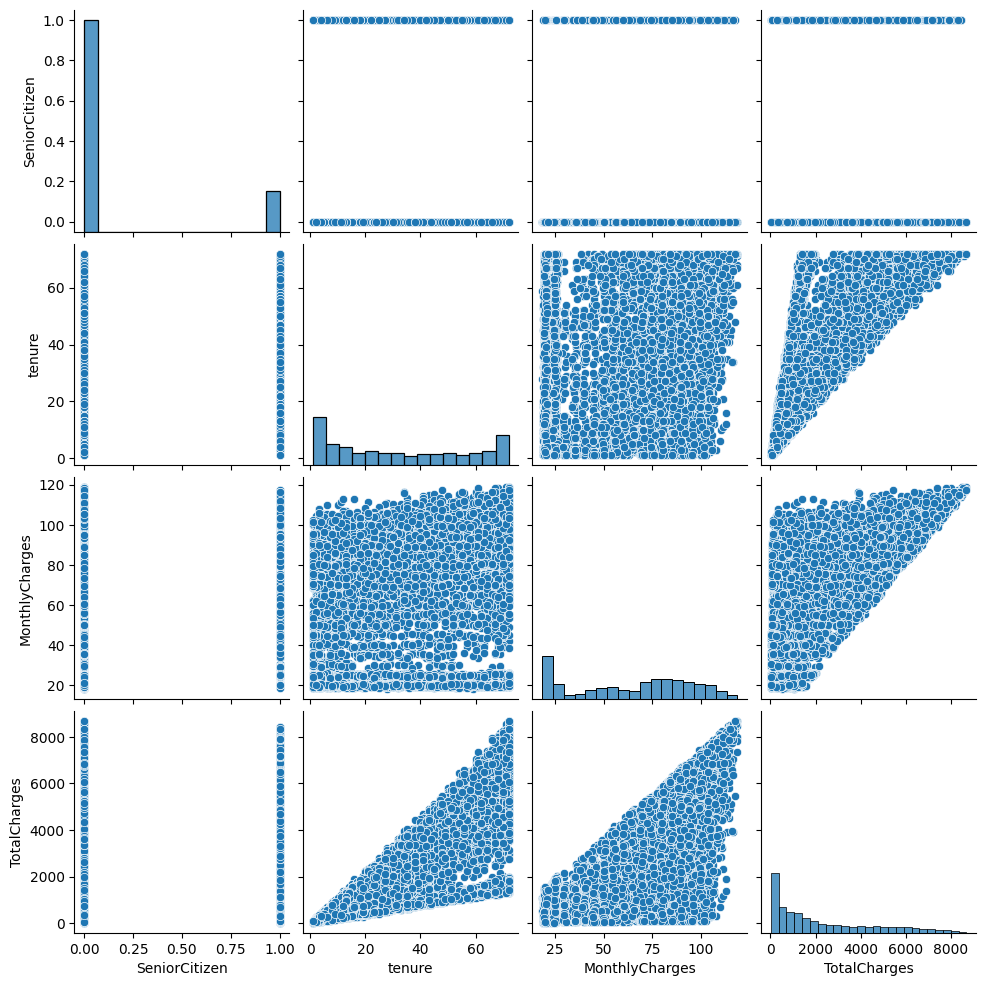

In [77]:
sns.pairplot(df)

In [78]:
#Importing label Encoder for encoding the object values of categorical columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Churn']=le.fit_transform(df['Churn'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])

In [79]:
df['InternetService']=le.fit_transform(df['InternetService'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['Contract']=le.fit_transform(df['Contract'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['gender']=le.fit_transform(df['gender'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])

<Axes: >

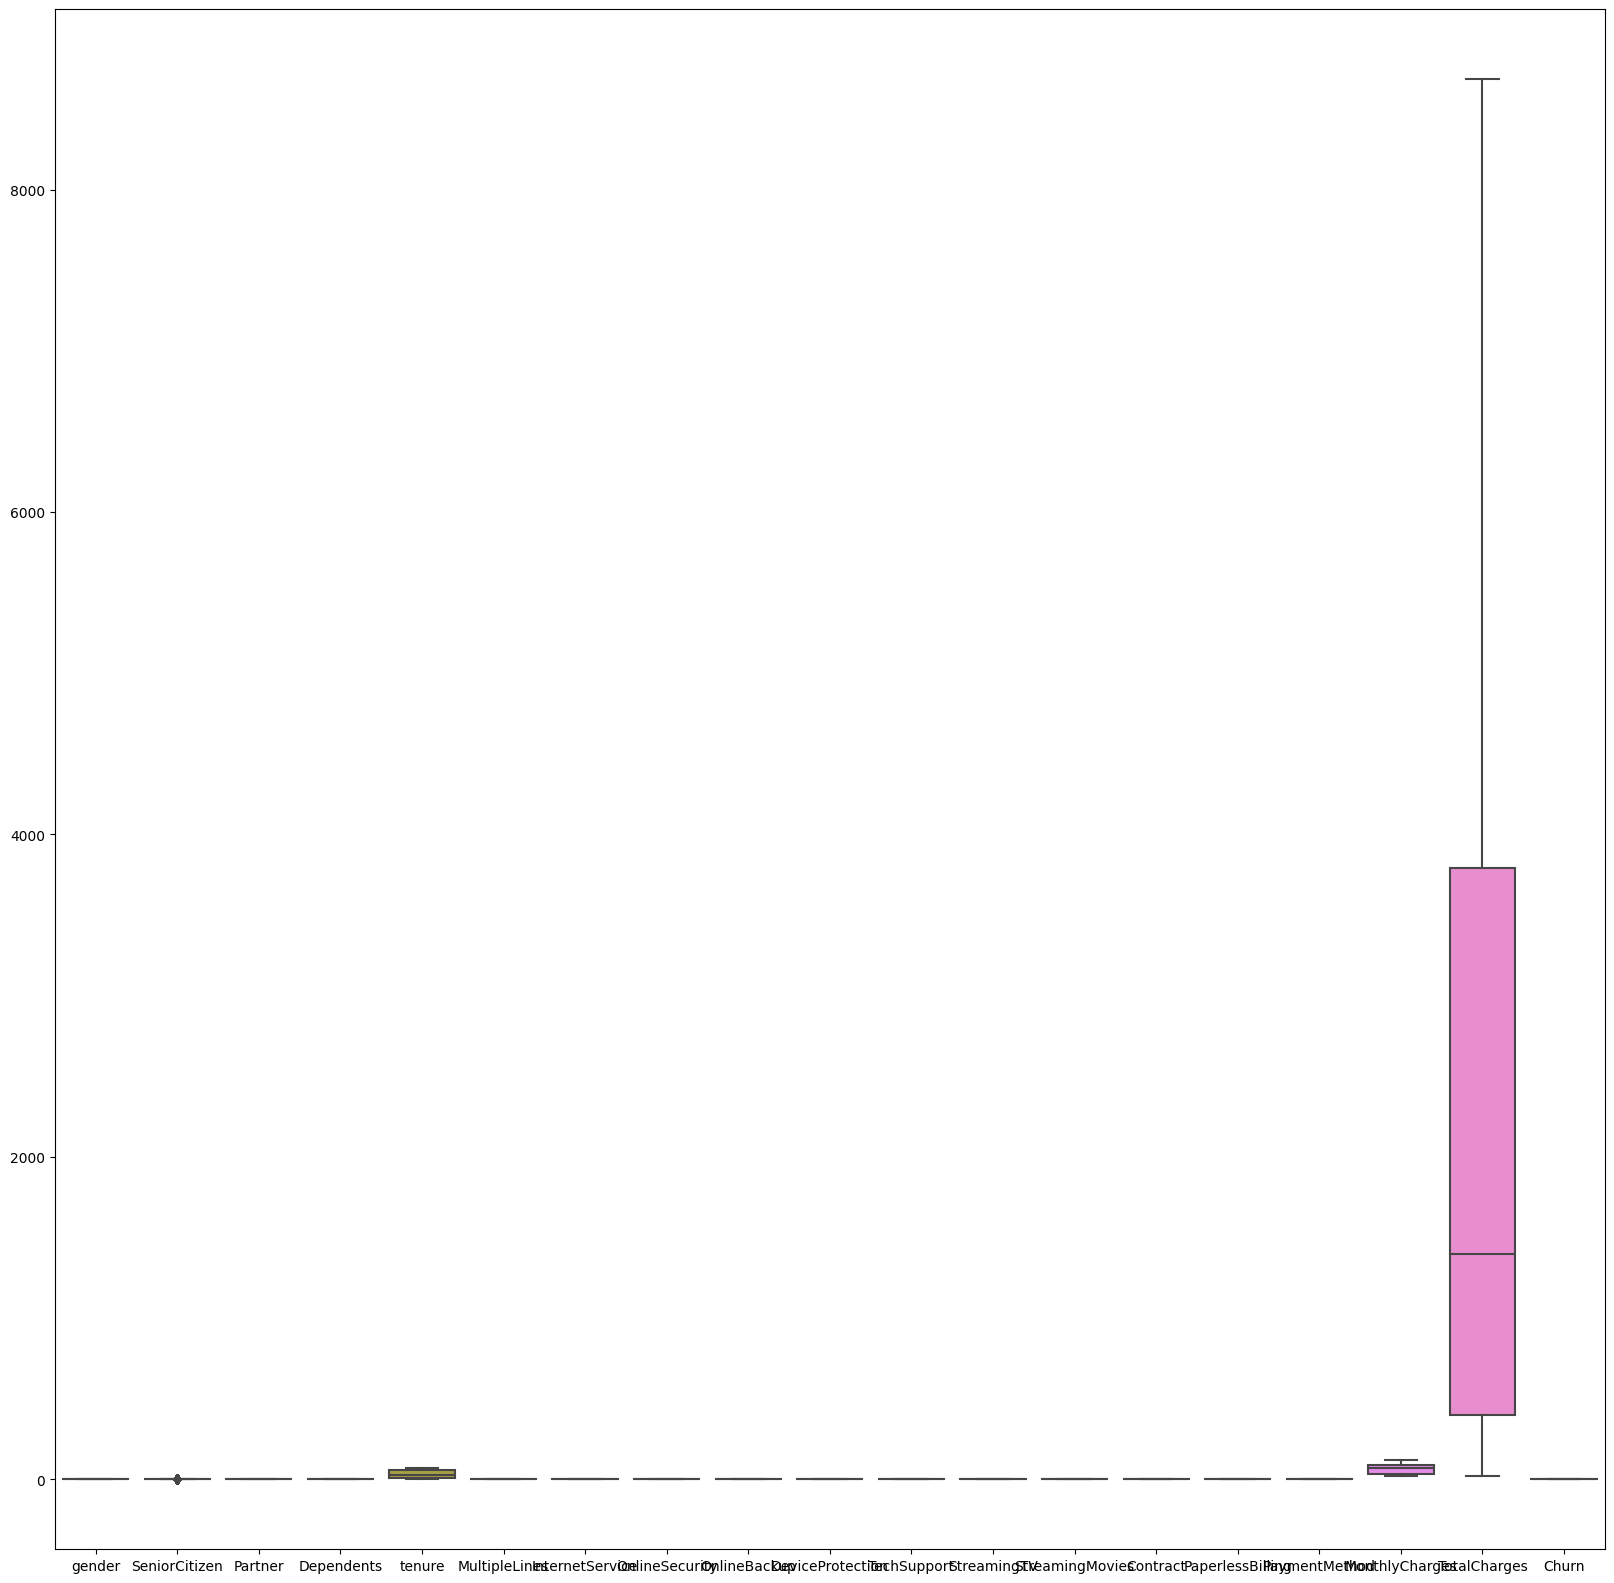

In [82]:
plt.figure(figsize=(20,20))
sns.boxplot(df)

<ipython-input-23-de9b9488f959>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


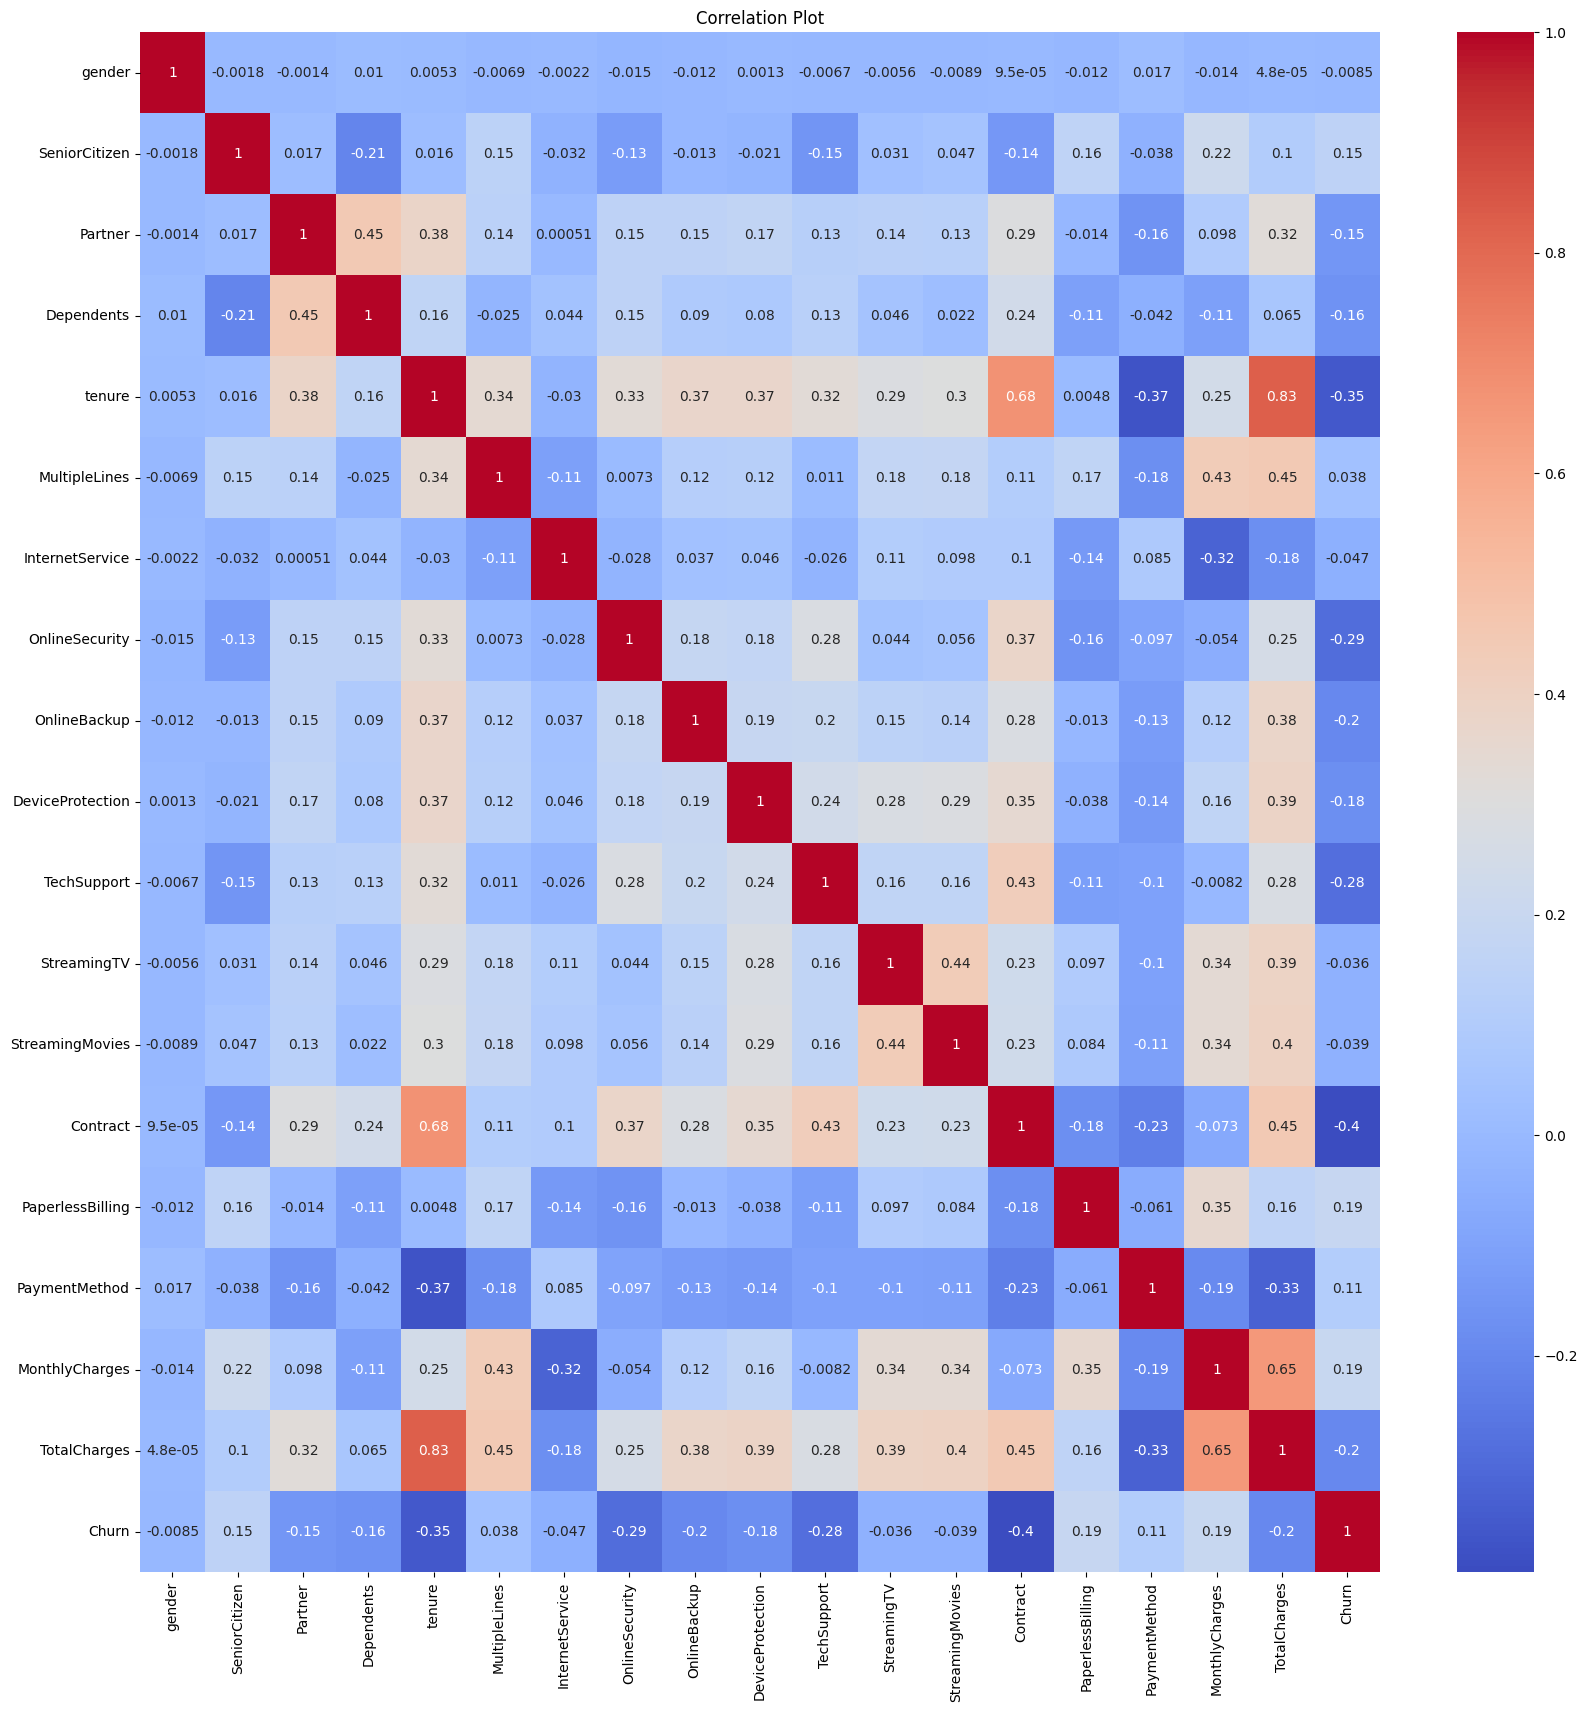

In [23]:
plt.figure(figsize=(20, 20))  # Set the figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()


In [24]:
df=df.drop(['PhoneService','StreamingTV','StreamingMovies','MultipleLines'],axis=1) #dropping based on their correlation with the target variable

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,2,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,0,2,0,2,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,0,2,2,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,0,0,0,0,1,2,70.70,151.65,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   InternetService   7032 non-null   int64  
 6   OnlineSecurity    7032 non-null   int64  
 7   OnlineBackup      7032 non-null   int64  
 8   DeviceProtection  7032 non-null   int64  
 9   TechSupport       7032 non-null   int64  
 10  Contract          7032 non-null   int64  
 11  PaperlessBilling  7032 non-null   int64  
 12  PaymentMethod     7032 non-null   int64  
 13  MonthlyCharges    7032 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7032 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 933

In [27]:
df.shape

(7032, 16)

**PERFORMING PRINCIPAL COMPONENT ANALYSIS to reduce dimensions and transform features**

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
n_components = 3  # Choose the number of principal components you want to retain
subset_columns=['InternetService','DeviceProtection','PaperlessBilling','Contract','OnlineBackup','OnlineSecurity','TechSupport','gender','PaymentMethod']
subset_data = df[subset_columns]
scaler = StandardScaler()
standardized_data = scaler.fit_transform(subset_data)
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(standardized_data)

In [29]:
principal_components.shape

(7032, 3)

In [30]:
principal_components=pd.DataFrame(principal_components)

In [31]:
principal_components

,0,1,2
0,-1.490635,-1.246960,-0.970145
1,0.323601,0.895776,1.326098
2,-0.779867,-0.517420,1.080701
3,2.007312,-0.502552,1.394991
4,-2.188489,-0.161230,-1.055688
...,...,...,...
7027,0.987118,-0.378434,1.394475
7028,0.309541,-1.004746,-1.210137
7029,-1.307162,-0.843447,-0.733396
7030,-2.430851,0.441415,0.919620


In [32]:
#Concatenating the original dataframe with the new prinicipal components

In [33]:
df = pd.concat([df, principal_components], axis=1)
df = df.reset_index(drop=True)

In [34]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,0,1,2
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0,-1.490635,-1.246960,-0.970145
1,1.0,0.0,0.0,0.0,34.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0,0.323601,0.895776,1.326098
2,1.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0,-0.779867,-0.517420,1.080701
3,1.0,0.0,0.0,0.0,45.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0,42.30,1840.75,0.0,2.007312,-0.502552,1.394991
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0,-2.188489,-0.161230,-1.055688


In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,0,1,2
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0,-1.490635,-1.246960,-0.970145
1,1.0,0.0,0.0,0.0,34.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0,0.323601,0.895776,1.326098
2,1.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0,-0.779867,-0.517420,1.080701
3,1.0,0.0,0.0,0.0,45.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0,42.30,1840.75,0.0,2.007312,-0.502552,1.394991
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0,-2.188489,-0.161230,-1.055688


In [36]:
df['PaymentMethod'].unique()

array([ 2.,  3.,  0.,  1., nan])

In [37]:

df=df.dropna(axis=0)

**TRAIN TEST SPLIT**

In [38]:
X=df.drop(['Churn'],axis=1)
y=df['Churn']

In [39]:
X.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
0                   0
1                   0
2                   0
dtype: int64

**TRAIN TEST SPLIT**

In [40]:
X.columns = X.columns.astype(str)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

**MODEL TRAINING**

In [45]:
log=LogisticRegression()
log.fit(X_train_scaled,y_train)
y_pred_log=log.predict(X_test_scaled)

gb=GradientBoostingClassifier()
gb.fit(X_train_scaled,y_train)
y_pred_gb=gb.predict(X_test_scaled)

dst=DecisionTreeClassifier()
dst.fit(X_train_scaled,y_train)
y_pred_dst=dst.predict(X_test_scaled)

rfc=RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
y_pred_rfc=rfc.predict(X_test_scaled)

svc=SVC()
svc.fit(X_train_scaled,y_train)
y_pred_svc=svc.predict(X_test_scaled)

knn=KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
y_pred_knn=knn.predict(X_test_scaled)

gnb=GaussianNB()
gnb.fit(X_train_scaled,y_train)
y_pred_gnb=gnb.predict(X_test_scaled)


**EVALUATION**

In [46]:
logreg_preds = log.predict(X_test_scaled)
gb_preds=gb.predict(X_test_scaled)
dst_preds=dst.predict(X_test_scaled)
rf_preds = rfc.predict(X_test_scaled)
gb_preds = gnb.predict(X_test_scaled)
svc_preds=svc.predict(X_test_scaled)
knn_preds=knn.predict(X_test_scaled)
gnb_preds=gnb.predict(X_test_scaled)
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)

    return accuracy

logreg_metrics = calculate_metrics(y_test, logreg_preds)
rf_metrics = calculate_metrics(y_test, rf_preds)
gb_metrics = calculate_metrics(y_test, gb_preds)
knn_metrics=calculate_metrics(y_test, knn_preds)
svc_metrics=calculate_metrics(y_test, svc_preds)
dst_metrics=calculate_metrics(y_test, dst_preds)
gnb_metrics=calculate_metrics(y_test,gnb_preds)

print("Logistic Regression Accuracy:", logreg_metrics*100)
print("Random Forest Accuracy:", rf_metrics*100)
print("Gradient Boosting Accuracy:", gb_metrics*100)
print("KNN  Accuracy:",knn_metrics*100)
print("SVC  Accuracy:",svc_metrics*100)
print("Decision Tree Accuracy:",dst_metrics*100)
print("Gaussian NaiveBayes Accuracy:",gnb_metrics*100)

accuracy=[logreg_metrics,rf_metrics,gb_metrics,knn_metrics,svc_metrics,dst_metrics,gnb_metrics]

Logistic Regression Accuracy: 80.42704626334519
Random Forest Accuracy: 80.2846975088968
Gradient Boosting Accuracy: 74.02135231316726
KNN  Accuracy: 76.22775800711744
SVC  Accuracy: 80.71174377224199
Decision Tree Accuracy: 73.73665480427046
Gaussian NaiveBayes Accuracy: 74.02135231316726


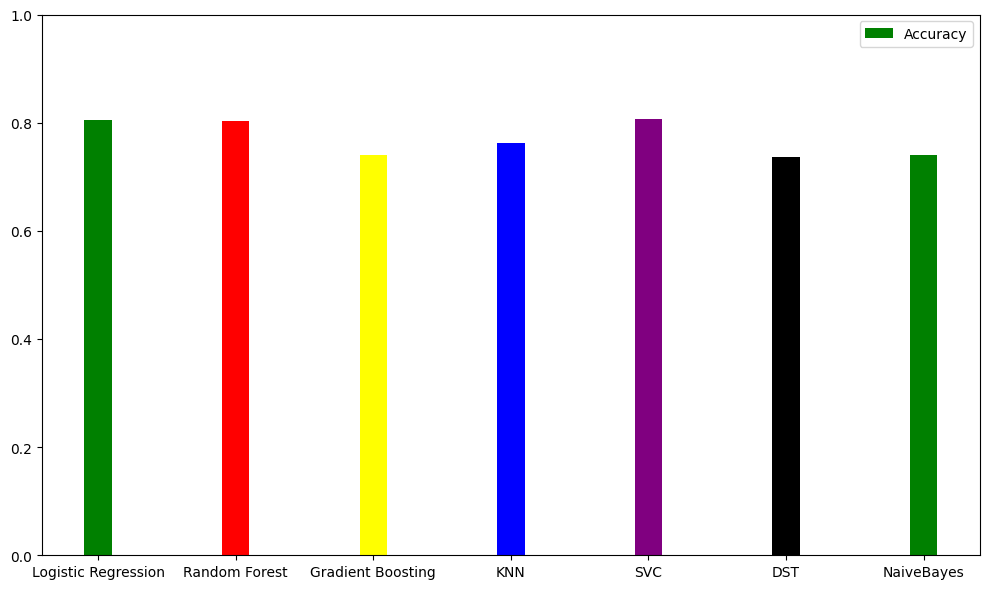

In [47]:
plt.figure(figsize=(10, 6))
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting',"KNN","SVC","DST","NaiveBayes"]
plt.bar(models, accuracy, color=['green','red','yellow','blue','purple','black'], width=0.2, label='Accuracy')
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()

**BEST MODEL : SUPPORT VECTOR CLASSIFIER (acc to accuracy)**

In [48]:
#getting the confusion matrix and classification report of the best model
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))



Confusion Matrix:
[[954 107]
 [164 180]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      1061
         1.0       0.63      0.52      0.57       344

    accuracy                           0.81      1405
   macro avg       0.74      0.71      0.72      1405
weighted avg       0.80      0.81      0.80      1405



In [50]:
#cross validations

In [51]:
# k -knn
# gridsearch cv (logistic and knn)
# random search for random forest
# outliers check


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None] + list(range(5, 30, 5)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    rfc,
    param_distributions=param_dist,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_scaled, y_train)
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 19, 'n_estimators': 162}
Best Score: 0.8048419808405928


**BEFORE V/S AFTER**

In [53]:
print("Random Forest Accuracy:", rf_metrics*100)
print("AFTER CV:", random_search.best_score_*100)

Random Forest Accuracy: 80.2846975088968
AFTER CV: 80.48419808405927


In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(
    knn,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)
print("Best 'k' value:", grid_search.best_params_['n_neighbors'])
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best 'k' value: 18
Best Score: 0.7722548270868257


**BEFORE VS AFTER**

In [56]:
print("KNN  Accuracy:",knn_metrics*100)
print("AFTER CV:", grid_search.best_score_*100)

KNN  Accuracy: 76.22775800711744
AFTER CV: 77.22548270868256


In [57]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(
    log,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)
grid_search.fit(X_train_scaled, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)




Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7984315334814285


**BEFORE V/S AFTER**

In [58]:
print("Logistic Regression Accuracy:", logreg_metrics*100)
print("AFTER CV:", grid_search.best_score_)

Logistic Regression Accuracy: 80.42704626334519
AFTER CV: 0.7984315334814285


**SVC REMAINS THE BEST MODEL followed by logistic regression, random forest(after cv)**

In [49]:
#Saving best model
import joblib
filename = 'model.sav'
joblib.dump(svc, filename)

['model.sav']